# 2022 Data Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 150
pd.options.display.max_rows = 50
import json
import requests

In [2]:
## Some column names are different for each year.
# We are going to read them separately, them select only the columns that we are going to need for the analysis.
# The rename the columns to match them for all the years.

## Load data to a pandas dataframe.

In [3]:
## 2022 Data
df_2022 = pd.read_csv("../Data/RawData/2022/survey_results_public.csv", low_memory=True)
df_2022.shape

(73268, 79)

In [4]:
df_2022.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,Daily or almost daily,Not sure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,Data scientist or machine learning specialist;...,20 to 99 employees,I have some influence,NaN,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,Collectives on Stack Overflow;Stack Overflow;S...,Multiple times per day,Yes,Multiple times per day,Neutral,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,"Developer, full-stack",100 to 499 employees,I have some influence,Other (please specify):,Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,NaN,NaN,Jira Work Management;Trello,Jira Work Management;Trello,Slack;Zoom

## Columns of interest
* Country
* Education
* Languages worked with
* Languages want to work with
* Developer Type
* Salary
* Salary Frequency
* Currency
* Employment

In [5]:
cols_of_interest2022 = ["Employment", "EdLevel", "DevType", "Country", "Currency", "CompTotal", "CompFreq", "LanguageHaveWorkedWith", "LanguageWantToWorkWith"]
df_2022 = df_2022[cols_of_interest2022]
df_2022.head()

,Employment,EdLevel,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Employed, full-time",NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript
2,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Data scientist or machine learning specialist;...,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript
3,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack",Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript
4,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, front-end;Developer, full-stack;Dev...",United States of America,USD\tUnited States dollar,NaN,NaN,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript


In [6]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Employment              71709 non-null  object 
 1   EdLevel                 71571 non-null  object 
 2   DevType                 61302 non-null  object 
 3   Country                 71771 non-null  object 
 4   Currency                51264 non-null  object 
 5   CompTotal               38422 non-null  float64
 6   CompFreq                44425 non-null  object 
 7   LanguageHaveWorkedWith  70975 non-null  object 
 8   LanguageWantToWorkWith  67027 non-null  object 
dtypes: float64(1), object(8)
memory usage: 5.0+ MB


## Clean Each column

### Extract the Education Level
* From the EdLevel column, we want only the level of education reached e.g Bachelor's Degree, Master's Degree etc.|

In [7]:
df_2022["EdLevel"] = df_2022["EdLevel"].str.split("(").str[0]

In [8]:
df_2022["EdLevel"].value_counts()

Bachelor’s degree                                         30276
Master’s degree                                           15486
Some college/university study without earning a degree     9326
Secondary school                                           7904
Associate degree                                           2236
Other doctoral degree                                      2169
Primary/elementary school                                  1806
Something else                                             1247
Professional degree                                        1121
Name: EdLevel, dtype: int64

### Convert the DevType column to a list.

In [9]:
df_2022["DevType"] = df_2022["DevType"].str.split(",")
df_2022.head()

,Employment,EdLevel,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Employed, full-time",NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript
2,"Employed, full-time",Master’s degree,[Data scientist or machine learning specialist...,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript
3,"Employed, full-time",Bachelor’s degree,"[Developer, full-stack]",Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript
4,"Employed, full-time",Bachelor’s degree,"[Developer, front-end;Developer, full-stack;...",United States of America,USD\tUnited States dollar,NaN,NaN,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript


### Get the Country currency.
* Extract the currency for each country from the currency column.

In [10]:
df_2022["Currency"] = df_2022["Currency"].str.replace("\t", " ").str.split(" ").str[0]
df_2022.head()

,Employment,EdLevel,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Employed, full-time",NaN,NaN,Canada,CAD,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript
2,"Employed, full-time",Master’s degree,[Data scientist or machine learning specialist...,United Kingdom of Great Britain and Northern I...,GBP,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript
3,"Employed, full-time",Bachelor’s degree,"[Developer, full-stack]",Israel,ILS,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript
4,"Employed, full-time",Bachelor’s degree,"[Developer, front-end;Developer, full-stack;...",United States of America,USD,NaN,NaN,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript


### Convert LanguageHaveWorkedWith & LanguageWantToWorkWith to list

In [11]:
def convert(x):
    """Split x into respoctive languages"""
    try:
        lst = x.split(";")
    except AttributeError:
        pass
    else:
        return lst

In [12]:
df_2022["LanguageHaveWorkedWith"] = df_2022["LanguageHaveWorkedWith"].apply(convert)
df_2022["LanguageWantToWorkWith"] = df_2022["LanguageWantToWorkWith"].apply(convert)
df_2022.head()

,Employment,EdLevel,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
1,"Employed, full-time",NaN,NaN,Canada,CAD,NaN,NaN,"[JavaScript, TypeScript]","[Rust, TypeScript]"
2,"Employed, full-time",Master’s degree,[Data scientist or machine learning specialist...,United Kingdom of Great Britain and Northern I...,GBP,32000.0,Yearly,"[C#, C++, HTML/CSS, JavaScript, Python]","[C#, C++, HTML/CSS, JavaScript, TypeScript]"
3,"Employed, full-time",Bachelor’s degree,"[Developer, full-stack]",Israel,ILS,60000.0,Monthly,"[C#, JavaScript, SQL, TypeScript]","[C#, SQL, TypeScript]"
4,"Employed, full-time",Bachelor’s degree,"[Developer, front-end;Developer, full-stack;...",United States of America,USD,NaN,NaN,"[C#, HTML/CSS, JavaScript, SQL, Swift, TypeScr...","[C#, Elixir, F#, Go, JavaScript, Rust, TypeScr..."


## Handling Missing Values

In [13]:
df_2022.isnull().sum()

Employment                 1559
EdLevel                    1697
DevType                   11966
Country                    1497
Currency                  22004
CompTotal                 34846
CompFreq                  28843
LanguageHaveWorkedWith     2293
LanguageWantToWorkWith     6241
dtype: int64

#### Drop Missing Values
* Dropping missing values will reduce our dataset by half.

In [14]:
df_2022 = df_2022.dropna(how="any").reset_index(drop=True)

In [15]:
df_2022.isnull().sum()

Employment                0
EdLevel                   0
DevType                   0
Country                   0
Currency                  0
CompTotal                 0
CompFreq                  0
LanguageHaveWorkedWith    0
LanguageWantToWorkWith    0
dtype: int64

In [16]:
df_2022.shape

(36212, 9)

### Add Year Column

In [17]:
df_2022["Year"] = 2022

In [18]:
df_2022.head()

,Employment,EdLevel,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,Year
0,"Employed, full-time",Master’s degree,[Data scientist or machine learning specialist...,United Kingdom of Great Britain and Northern I...,GBP,32000.0,Yearly,"[C#, C++, HTML/CSS, JavaScript, Python]","[C#, C++, HTML/CSS, JavaScript, TypeScript]",2022
1,"Employed, full-time",Bachelor’s degree,"[Developer, full-stack]",Israel,ILS,60000.0,Monthly,"[C#, JavaScript, SQL, TypeScript]","[C#, SQL, TypeScript]",2022
2,"Employed, full-time",Bachelor’s degree,"[Developer, full-stack;Developer, back-end]",United Kingdom of Great Britain and Northern I...,GBP,48000.0,Yearly,"[Bash/Shell, C#, HTML/CSS, JavaScript, PowerSh...","[C#, Go, JavaScript]",2022
3,"Employed, full-time;Independent contractor, fr...",Bachelor’s degree,[Engineering manager],United States of America,USD,194400.0,Yearly,"[C#, HTML/CSS, JavaScript, PowerShell, Python,...","[C++, Go, HTML/CSS, JavaScript, Lua, Rust, Typ...",2022
4,"Employed, full-time",Bachelor’s degree,"[Developer, full-stack]",United States of America,USD,65000.0,Yearly,"[C, HTML/CSS, Rust, SQL, Swift, TypeScript]","[Haskell, HTML/CSS, Rust, Swift]",2022


### Standardize the currency
* Respondent are paid in different currencies depending on the country they are from.
* We can attempt to convert them to USD.
* Note: We are going to use the current exchange rates.
* We can use this API: https://exchangeratesapi.io
* I used the conversion rates of June 24th 2022.

In [19]:
with open("../api_keys.json", "r") as jsonObj:
    API_KEY = json.load(jsonObj)["exchange_rate"]
currencies = df_2022.Currency.unique().tolist()
currency_symbols = ",".join(currencies)
URL = f"http://api.exchangeratesapi.io/v1/2022-06-24"
PARAMS = {"access_key": API_KEY, "base": "EUR", "symbols": currency_symbols}
response = requests.get(URL, params=PARAMS)
data = response.json()
response.status_code

200

In [20]:
rates = data["rates"]
currency = []
exchange_rate = []
for k,v in rates.items():
    currency.append(k)
    exchange_rate.append(v)
exchanges = pd.DataFrame({"Currency": currency, "Exchange_rate_Euros": exchange_rate})
exchanges.head()

,Currency,Exchange_rate_Euros
0,GBP,0.860766
1,ILS,3.602258
2,USD,1.055687
3,CZK,24.736912
4,EUR,1.000000


In [26]:
us=exchanges[exchanges.Currency == "USD"].iloc[:, 1]
us*100

2    105.5687
Name: Exchange_rate_Euros, dtype: float64

In [65]:
# Exchange rates are in Euros, lets convert the to USD.
# Multiply the Exchange_rate_Euros by 1/1.055687
exchanges["Exchange_rate_USD"] = exchanges["Exchange_rate_Euros"]*(1/1.055687)
exchanges.head()

,Currency,Exchange_rate_Euros,Exchange_rate_USD
0,GBP,0.860766,0.815361
1,ILS,3.602258,3.412241
2,USD,1.055687,1.000000
3,CZK,24.736912,23.432051
4,EUR,1.000000,0.947250


In [66]:
## Drop the Exchange_rate_Euros
exchanges = exchanges.drop("Exchange_rate_Euros", axis=1)
exchanges.head()

,Currency,Exchange_rate_USD
0,GBP,0.815361
1,ILS,3.412241
2,USD,1.000000
3,CZK,23.432051
4,EUR,0.947250


In [67]:
# Merge the exchanges df to df_2022 on Currency
df_2022 = df_2022.merge(exchanges, left_on="Currency", right_on="Currency", how="left")
df_2022.head()

,Employment,EdLevel,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,Year,Exchange_rate_USD
0,"Employed, full-time",Master’s degree,[Data scientist or machine learning specialist...,United Kingdom of Great Britain and Northern I...,GBP,32000.0,Yearly,"[C#, C++, HTML/CSS, JavaScript, Python]","[C#, C++, HTML/CSS, JavaScript, TypeScript]",2022,0.815361
1,"Employed, full-time",Bachelor’s degree,"[Developer, full-stack]",Israel,ILS,60000.0,Monthly,"[C#, JavaScript, SQL, TypeScript]","[C#, SQL, TypeScript]",2022,3.412241
2,"Employed, full-time",Bachelor’s degree,"[Developer, full-stack;Developer, back-end]",United Kingdom of Great Britain and Northern I...,GBP,48000.0,Yearly,"[Bash/Shell, C#, HTML/CSS, JavaScript, PowerSh...","[C#, Go, JavaScript]",2022,0.815361
3,"Employed, full-time;Independent contractor, fr...",Bachelor’s degree,[Engineering manager],United States of America,USD,194400.0,Yearly,"[C#, HTML/CSS, JavaScript, PowerShell, Python,...","[C++, Go, HTML/CSS, JavaScript, Lua, Rust, Typ...",2022,1.000000
4,"Employed, full-time",Bachelor’s degree,"[Developer, full-stack]",United States of America,USD,65000.0,Yearly,"[C, HTML/CSS, Rust, SQL, Swift, TypeScript]","[Haskell, HTML/CSS, Rust, Swift]",2022,1.000000


**The API's free tier does not support direct conversion to USD, so I first converted to Euros (with the API) then to USD (By division).**

In [68]:
# Check for missing value in Exchange_rate_USD column
# To find out whether there is a row without conversion value.
# The API didnot return a the Venezualan currency.append.
df_2022[df_2022["Exchange_rate_USD"].isnull()]

,Employment,EdLevel,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,Year,Exchange_rate_USD
19768,"Employed, full-time",Secondary school,"[Developer, front-end;Student]","Venezuela, Bolivarian Republic of...",VES,700.0,Monthly,"[C#, JavaScript, TypeScript]","[Bash/Shell, C, C#, C++, Python, SQL, TypeScript]",2022,NaN
23266,"Employed, full-time",Professional degree,"[Developer, back-end]","Venezuela, Bolivarian Republic of...",VES,700.0,Monthly,"[APL, JavaScript]","[APL, JavaScript, PHP]",2022,NaN
23428,"Employed, full-time;Independent contractor, fr...",Bachelor’s degree,"[Developer, back-end;Developer, mobile]","Venezuela, Bolivarian Republic of...",VES,3600.0,Monthly,"[HTML/CSS, Java, JavaScript, PHP, SQL]","[HTML/CSS, Java, JavaScript, Kotlin, PHP, Pyth...",2022,NaN
30042,"Employed, full-time",Bachelor’s degree,"[Developer, front-end;Developer, full-stack;...","Venezuela, Bolivarian Republic of...",VES,1400.0,Monthly,"[HTML/CSS, JavaScript, Kotlin, SQL]","[Dart, HTML/CSS, JavaScript, Kotlin, SQL]",2022,NaN


In [69]:
# Let's just drop the four rows.
df_2022 = df_2022[df_2022["Exchange_rate_USD"].notnull()]
df_2022.shape

(36208, 11)

### Convert the salary column to USD
* Divide the CompTotal column by Exchange_rate_USD
* Round results to the nearest 4 dps.

In [70]:
df_2022["Salary"] = round(df_2022["CompTotal"]/df_2022["Exchange_rate_USD"], 4)
df_2022.head(2)

,Employment,EdLevel,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,Year,Exchange_rate_USD,Salary
0,"Employed, full-time",Master’s degree,[Data scientist or machine learning specialist...,United Kingdom of Great Britain and Northern I...,GBP,32000.0,Yearly,"[C#, C++, HTML/CSS, JavaScript, Python]","[C#, C++, HTML/CSS, JavaScript, TypeScript]",2022,0.815361,39246.4200
1,"Employed, full-time",Bachelor’s degree,"[Developer, full-stack]",Israel,ILS,60000.0,Monthly,"[C#, JavaScript, SQL, TypeScript]","[C#, SQL, TypeScript]",2022,3.412241,17583.7544


In [71]:
# Drop the CompTotal and the Exchange_rate_USD.
# We don't need them any more.
df_2022 = df_2022.drop(["CompTotal", "Exchange_rate_USD"], axis=1)

### Convert The salary column to common scale
* Some respondent used monthly salary, others weekly salary and others used annual salary.
* We need to convert all salaries to annual by multiplying monthly salaries by 12 and weekly salaries by 52.

In [72]:
df_2022["CompFreq"].value_counts()

Yearly     21432
Monthly    14030
Weekly       746
Name: CompFreq, dtype: int64

In [73]:
df_2022["AnnualSalary"] = df_2022[["Salary", "CompFreq"]]\
    .apply(lambda x: x["Salary"]*12 if x["CompFreq"] == "Monthly" else (x["Salary"]*52 if x["CompFreq"] == "Weekly" else x["Salary"]), axis=1)

In [74]:
df_2022.head()

,Employment,EdLevel,DevType,Country,Currency,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,Year,Salary,AnnualSalary
0,"Employed, full-time",Master’s degree,[Data scientist or machine learning specialist...,United Kingdom of Great Britain and Northern I...,GBP,Yearly,"[C#, C++, HTML/CSS, JavaScript, Python]","[C#, C++, HTML/CSS, JavaScript, TypeScript]",2022,39246.4200,39246.4200
1,"Employed, full-time",Bachelor’s degree,"[Developer, full-stack]",Israel,ILS,Monthly,"[C#, JavaScript, SQL, TypeScript]","[C#, SQL, TypeScript]",2022,17583.7544,211005.0528
2,"Employed, full-time",Bachelor’s degree,"[Developer, full-stack;Developer, back-end]",United Kingdom of Great Britain and Northern I...,GBP,Yearly,"[Bash/Shell, C#, HTML/CSS, JavaScript, PowerSh...","[C#, Go, JavaScript]",2022,58869.6301,58869.6301
3,"Employed, full-time;Independent contractor, fr...",Bachelor’s degree,[Engineering manager],United States of America,USD,Yearly,"[C#, HTML/CSS, JavaScript, PowerShell, Python,...","[C++, Go, HTML/CSS, JavaScript, Lua, Rust, Typ...",2022,194400.0000,194400.0000
4,"Employed, full-time",Bachelor’s degree,"[Developer, full-stack]",United States of America,USD,Yearly,"[C, HTML/CSS, Rust, SQL, Swift, TypeScript]","[Haskell, HTML/CSS, Rust, Swift]",2022,65000.0000,65000.0000


In [75]:
df_weekly_salary = df_2022[df_2022.CompFreq == "Weekly"].Salary.mean()
df_monthly_salary = df_2022[df_2022.CompFreq == "Monthly"].Salary.mean()
df_annual_salary = df_2022[df_2022.CompFreq == "Yearly"].Salary.mean()

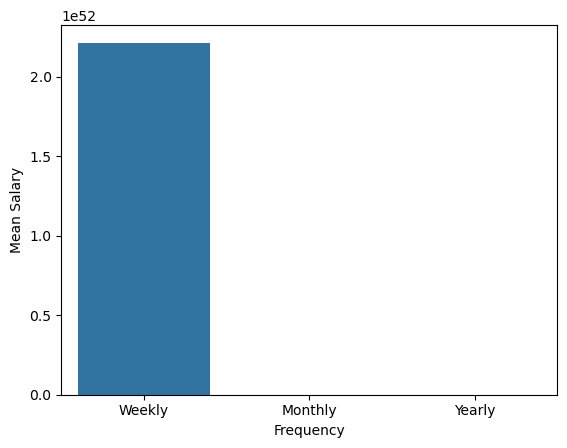

In [76]:
salary_freq = ["Weekly", "Monthly", "Yearly"]
mean_salary_freq = [df_weekly_salary, df_monthly_salary, df_annual_salary]
sns.barplot(x=salary_freq, y=mean_salary_freq)
plt.xlabel("Frequency")
plt.ylabel("Mean Salary")
plt.show()

* Weekly paid developer have wildy high salaries.
* Lets investigate them further to see what action we should take.

In [77]:
weekly = df_2022[df_2022.CompFreq == "Weekly"].copy()
weekly_max = weekly.Salary.max()
weekly_df = weekly[weekly.Salary == weekly_max]
weekly_df

,Employment,EdLevel,DevType,Country,Currency,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,Year,Salary,AnnualSalary
17529,"Employed, full-time;Employed, part-time",Secondary school,"[Developer, full-stack;Academic researcher]",Ecuador,DOP,Weekly,"[APL, COBOL, Scala]","[C++, Dart, MATLAB, VBA]",2022,1.649548e+55,8.577650e+56


In [78]:
# Recommendation: Drop the rows with weekly salaries
df_2022 = df_2022[df_2022["CompFreq"] != "Weekly"]
df_2022["CompFreq"].value_counts()

Yearly     21432
Monthly    14030
Name: CompFreq, dtype: int64

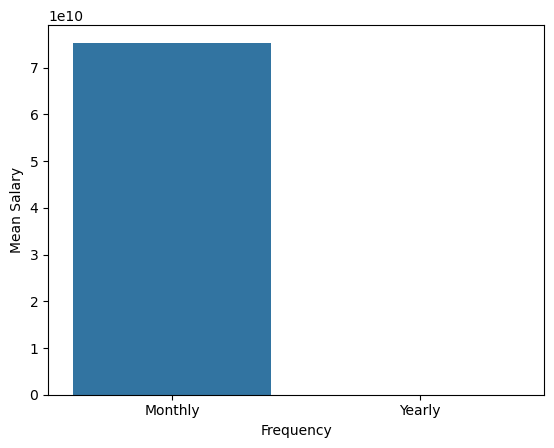

In [79]:
salary_freq = ["Monthly", "Yearly"]
df_monthly_salary = df_2022[df_2022.CompFreq == "Monthly"].Salary.mean()
df_annual_salary = df_2022[df_2022.CompFreq == "Yearly"].Salary.mean()
mean_salary_freq = [df_monthly_salary, df_annual_salary]
sns.barplot(x=salary_freq, y=mean_salary_freq)
plt.xlabel("Frequency")
plt.ylabel("Mean Salary")
plt.show()

* Average monthly salary is still high, but we"ll eliminate the outliers during Analysis.

In [42]:
# Drop the CompFreq and Salary columns
df_2022 = df_2022.drop(["CompFreq", "Salary"], axis=1)

In [46]:
df_2022.head(3)

,Employment,EdLevel,DevType,Country,Currency,LanguageHaveWorkedWith,LanguageWantToWorkWith,Year,AnnualSalary
0,"Employed, full-time",Master’s degree,[Data scientist or machine learning specialist...,United Kingdom of Great Britain and Northern I...,GBP,"[C#, C++, HTML/CSS, JavaScript, Python]","[C#, C++, HTML/CSS, JavaScript, TypeScript]",2022,39246.4200
1,"Employed, full-time",Bachelor’s degree,"[Developer, full-stack]",Israel,ILS,"[C#, JavaScript, SQL, TypeScript]","[C#, SQL, TypeScript]",2022,211005.0528
2,"Employed, full-time",Bachelor’s degree,"[Developer, full-stack;Developer, back-end]",United Kingdom of Great Britain and Northern I...,GBP,"[Bash/Shell, C#, HTML/CSS, JavaScript, PowerSh...","[C#, Go, JavaScript]",2022,58869.6301


### Save the data into a csv file.
We'll use this data later for analysis.

In [44]:
df_2022.to_csv("../Data/CleanData/2022.csv", index=False)

# END